# Zadanie 0

In [12]:
import numpy as np
import scipy.spatial.distance as dist
from sklearn import datasets 
iris = datasets.load_iris()

from collections import Counter
import matplotlib
import matplotlib.pyplot as plt

data = iris.data
data.shape

(150, 4)

In [3]:
def k_means(K, data, it):
    N=data.shape[0]
    initialArgs = np.random.choice(N, (K,), replace=False)
    centers = data[initialArgs, :]
    oldErr = np.inf
    
    for i in range(it):
        distM = dist.cdist(centers, data)
        assign = np.argmin(distM, axis=0)
        for k in range(K):
            centers[k] = data[assign==k].mean(axis=0)
        err = np.sum(((centers[assign]-data)**2))
        if(oldErr<err):
            break
        oldErr = err
    return assign, centers

(3, 4)


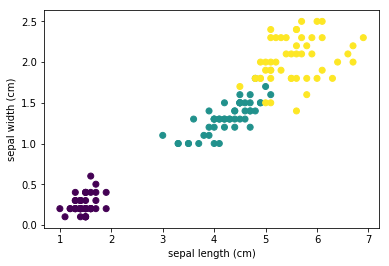

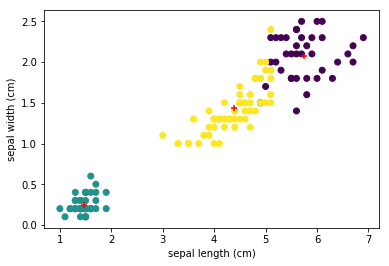

In [4]:
assign, centers = k_means(3, data, 10000)
print centers.shape

plt.scatter(iris.data[:, 2], iris.data[:, 3], c = iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.savefig("zadanie0_0.png")

plt.figure(2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c = assign)
plt.scatter(centers[:, 2],centers[:, 3], marker='+', c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.savefig("zadanie0_1.png")
plt.show()

# zadanie 1

In [18]:
def plotKMeans(data, clusters, centers):
    plt.scatter(data[:, 0], data[:, 1], c = clusters, marker='.')
    plt.scatter(centers[:, 0],centers[:, 1], marker='+', c='red')
    plt.savefig("zadanie1_1.png")
    plt.show()
    
def compClustersToTargets(k, clusters, targets):
    c=[None]*k
    for i in range(k):
        c[i] = Counter(targets[assign==i])
    print 'Appearances of class i in particular cluster: ', [np.max(c[i].values())*1.0/np.sum(c[i].values()) for i in range(k)]
    
def Kgauss(K, d, means, covs):
    return np.random.randn()
def error(assign, kMeansResult):
    print "Accuracy of clustering: ", (np.array([assign==kMeansResult]).mean()*100), "%"

def genSample(d, K, probs, means, covs):
    sample = []
    assign = []
    for i in range(5000):
        nowK = np.random.choice(K, p=probs)
        newObs = np.random.multivariate_normal(mean=means[:, nowK], cov=covs[:, :, nowK])
        sample.append(newObs)
        assign.append(nowK)
    return np.array(sample), np.array(assign)

In [6]:
d = 2
K = 5
probs = [1.0/K]*K
means = np.array([3*k for k in range(K)])
means = np.vstack((means, means))
means.reshape(d, -1)
covs = np.repeat(np.identity(d)[:, :, np.newaxis], K, axis=2)
sample, correct = genSample(d, K, probs, means, covs)

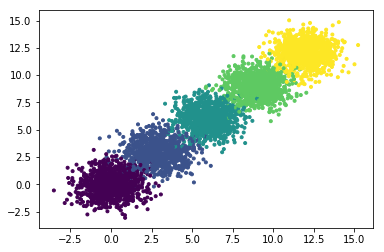

In [7]:
plt.scatter(sample[:, 0], sample[:, 1], c = correct, marker = '.')
plt.show()

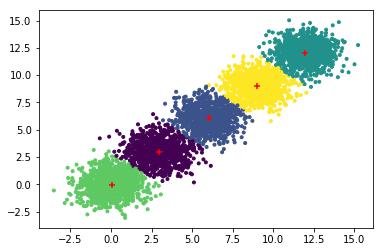

Appearances of class i in particular cluster:  [0.96044624746450302, 0.96905222437137328, 0.985200845665962, 0.9777131782945736, 0.97305389221556882]


In [19]:
assign, centers = k_means(5, sample, 1000)

plotKMeans(sample, assign, centers)
compClustersToTargets(5, assign, correct)

In [24]:
d = 2
K = 5
probs = [1.0/K]*K
means = np.array([3*k for k in range(K)])
means = np.vstack((means, means))
means.reshape(d, -1)
covs = np.repeat(np.identity(d)[:, :, np.newaxis], K, axis=2)
covs[:, :, 2] = [[3, 0],[0, 1]]
sample, correct = genSample(d, K, probs, means, covs)

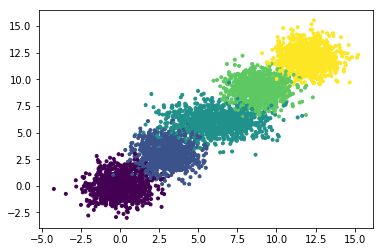

In [26]:
plt.scatter(sample[:, 0], sample[:, 1], c=correct, marker='.')
plt.show()

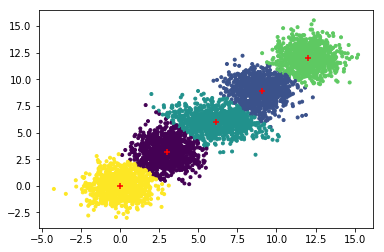

Appearances of class i in particular cluster:  [0.91412742382271472, 0.92843326885880073, 0.95955056179775278, 0.9889001009081736, 0.9760479041916168]


In [27]:
assign, centers = k_means(5, sample, 1000)

plotKMeans(sample, assign, centers)
compClustersToTargets(5, assign, correct)

In [29]:
covs[:, :, 0] = [[3, 1],[1, 1]]
sample, correct = genSample(d, K, probs, means, covs)

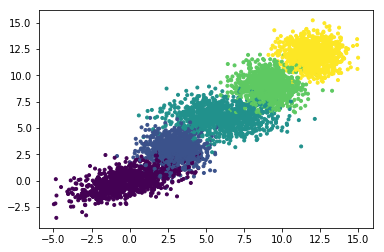

In [30]:
plt.scatter(sample[:, 0], sample[:, 1], c=correct, marker='.')
plt.show()

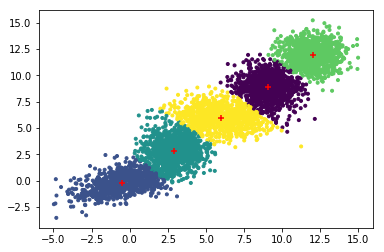

Appearances of class i in particular cluster:  [0.93533697632058288, 0.9861910241657077, 0.81873905429071803, 0.97973657548125637, 0.96238938053097345]


In [32]:
assign, centers = k_means(5, sample, 1000)

plotKMeans(sample, assign, centers)
compClustersToTargets(5, assign, correct)

In [33]:
p = [0.2, 0.1, 0.3, 0.1, 0.3]
sample, correct = genSample(d, K, probs, means, covs)

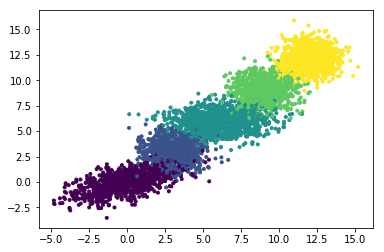

In [34]:
plt.scatter(sample[:, 0], sample[:, 1], c=correct, marker='.')
plt.show()

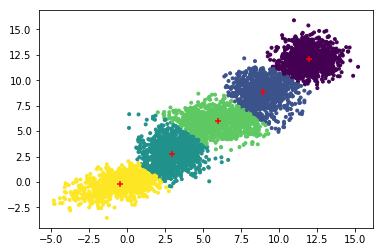

Appearances of class i in particular cluster:  [0.97977755308392311, 0.89375582479030757, 0.80258620689655169, 0.96481876332622596, 0.99047619047619051]


In [36]:
assign, centers = k_means(5, sample, 1000)

plotKMeans(sample, assign, centers)
compClustersToTargets(5, assign, correct)

In [37]:
d = 3
K = 5
probs = [1.0/K]*K
means = np.array([3*k for k in range(K)])
means = np.vstack((means, means, means))
means.reshape(d, -1)
covs = np.repeat(np.identity(d)[:, :, np.newaxis], K, axis=2)
covs[:, :, 2] = [[3, 1, 0], [1, 1, 0], [0, 0, 1]]
sample, correct = genSample(d, K, probs, means, covs)

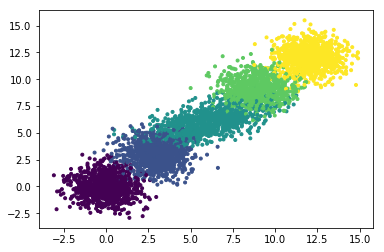

In [38]:
plt.scatter(sample[:, 0], sample[:, 1], c=correct, marker='.')
plt.show()

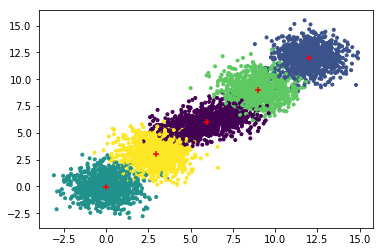

Appearances of class i in particular cluster:  [0.98818474758324382, 0.99604743083003955, 0.9951171875, 0.95634920634920639, 0.94926829268292678]


In [39]:
assign, centers = k_means(5, sample, 1000)

plotKMeans(sample, assign, centers)
compClustersToTargets(5, assign, correct)

In [40]:
d = 100
K = 10
probs = [1.0/K]*K
means = np.array([3*k for k in range(K)])
means = np.repeat(means, 100)
print(means.shape)
means = means.reshape((10, 100)).transpose()
print(means)
covs = np.repeat(np.identity(d)[:, :, np.newaxis], K, axis=2)
sample, correct = genSample(d, K, probs, means, covs)

(1000,)
[[ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  3  6  9 12 15 18 21 24 27]
 [

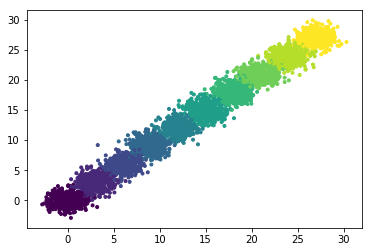

In [42]:
plt.scatter(sample[:, 0], sample[:, 1], c=correct, marker='.')
plt.show()

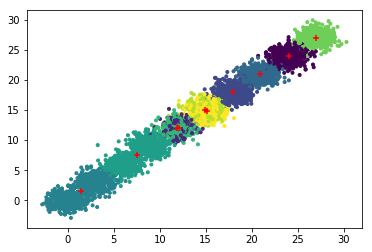

Appearances of class i in particular cluster:  [1.0, 1.0, 1.0, 1.0, 0.50258531540847984, 0.51269035532994922, 1.0, 1.0, 1.0, 1.0]


In [48]:
assign, centers = k_means(10, sample, 10000)

plotKMeans(sample, assign, centers)
compClustersToTargets(10, assign, correct)